# Sleep Disorder Prediction

## Introduction

Sleep disorders significantly affect an individual's physical and mental health, influencing daily functioning and overall quality of life. Understanding and predicting these disorders can lead to better diagnosis, management, and treatment, thereby improving patients' well-being. This project aims to leverage machine learning techniques to predict the presence and type of sleep disorders by analyzing a comprehensive dataset that includes various lifestyle and medical variables. By identifying patterns and correlations within the data, the model can provide insights into the factors contributing to sleep disorders and assist healthcare professionals in making informed decisions.

## Objective

The primary objectives of this project are:

1. **Data Exploration and Visualization**:
   - Conduct an in-depth analysis of the dataset to understand the distribution and relationships of various features.
   - Visualize the data to identify trends, patterns, and correlations that may influence the occurrence of sleep disorders.

2. **Data Preprocessing**:
   - Clean and preprocess the dataset to ensure it is suitable for machine learning modeling.
   - Handle missing values, encode categorical variables, and standardize numerical features to prepare the data for analysis.

3. **Model Development**:
   - Develop and train multiple machine learning models, including Decision Tree Classifier and Random Forest Classifier, to predict sleep disorders.
   - Use hyperparameter tuning and cross-validation techniques to optimize the performance of the models.

4. **Model Evaluation**:
   - Evaluate the performance of the trained models using various metrics such as accuracy, precision, recall, and F1-score.
   - Compare the models to identify the best-performing model for predicting sleep disorders.

5. **Implementation and Usage**:
   - Implement the best-performing model to predict sleep disorders for new data.
   - Provide actionable insights and recommendations to healthcare professionals to reduce the prevalence of sleep disorders and improve patient outcomes.

## Dataset

The dataset used for this project is the "Sleep Health and Lifestyle Dataset" from Kaggle. It contains around 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. This dataset provides comprehensive information on individuals' lifestyle and medical variables, which are crucial for predicting sleep disorders. The dataset includes the following features:

- **Person_ID**: Unique ID assigned to each person.
- **Gender**: The gender of the person (Male/Female).
- **Age**: Age of the person in years.
- **Occupation**: The occupation of the person.
- **Sleep_duration**: The duration of sleep of the person in hours.
- **Quality_of_sleep**: A subjective rating of the quality of sleep, ranging from 1 to 10.
- **Physical_activity**: The level of physical activity of the person (Low/Medium/High).
- **Stress Level**: A subjective rating of the stress level, ranging from 1 to 10.
- **BMI_category**: The BMI category of the person (Underweight/Normal/Overweight/Obesity).
- **Blood_pressure**: The blood pressure of the person in mmHg.
- **Heart_rate**: The heart rate of the person in beats per minute.
- **Daily Steps**: The number of steps taken by the person per day.
- **Sleep_disorder**: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

The dataset can be downloaded from here. **Sleep Health and Lifestyle Dataset** - [Kaggle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

## Install Required Packages:

To enhance the functionality of the CTPO environment, you may need to install some libraries not pre-installed but required for this notebook. Follow these steps to install the necessary libraries from the requirements.txt file:

**1. Create and Activate the Virtual Environment**:

Open your terminal or command prompt within the jupyter notebook. File -> New -> Terminal

Navigate to the project directory where you want to set up the environment.

Execute the following commands to create and activate the virtual environment:

```
bash
python3 -m venv --system-site-packages myvenv #myvenv is name of virtual environment you can change it
source myvenv/bin/activate
pip3 install ipykernel
python -m ipykernel install --user --name=myvenv --display-name="Python (myvenv)"
```

**2 Install Required Libraries**

Before running the following command in jupyter notebook, make sure you are in the directory where the Jupyter Notebook and virtual environment is located. This ensures the ./ path is always current. You can use the cd command to change to your project directory and pwd to verify your current directory.


In [1]:
!. ./myvenv/bin/activate; pip install -r requirements.txt

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data Preprocessing Part 1

In [4]:
#checking for missing values
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [5]:
#replacing the null values with 'None' in the column 'Sleep Disorder'
df['Sleep Disorder'].fillna('None', inplace=True)

The nan/None value in sleep disorder stands for no sleep disorder, so it is not a missing value.

In [6]:
#drop column Person ID
df.drop('Person ID', axis=1, inplace=True)

In [7]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())


Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


#### Splitting the blood pressure into systolic and diastolic

In [8]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [9]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [10]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### Checking the unique values from each categorical column

In [11]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['None' 'Sleep Apnea' 'Insomnia']


## Explorative Data Analysis

<Axes: xlabel='Sleep Disorder', ylabel='count'>

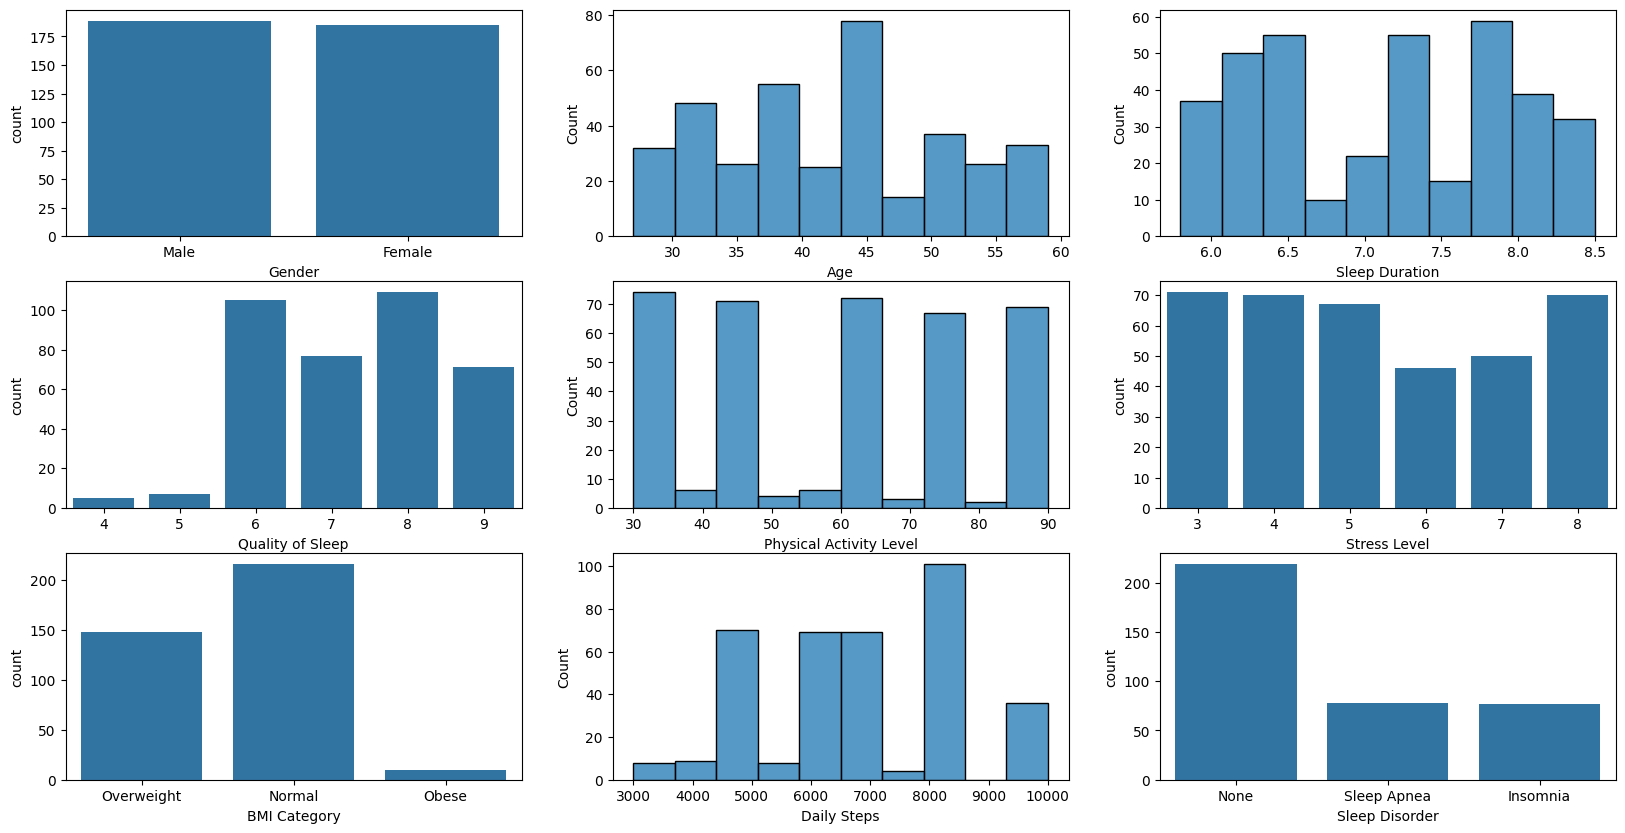

In [12]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0])
sns.histplot(x = 'Age', data = df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = df, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = df, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2,2])


The number of males and females is almost equal, out of which majority of the people have age between 30-45 years. Most of the people have sleep quality greater than 5 which means there are getting sufficient sleep. Moreover, most of the people have normal BMI whci directly relates with the distribution of sleep disorder which shows equal number of people with and without sleep disorder.

#### Phase 2

#### Gender and Sleep Disorder

Text(0.5, 1.0, 'Gender and Sleep Disorder')

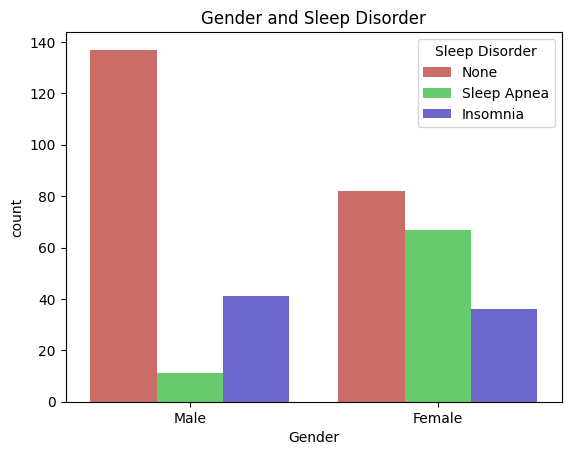

In [13]:
#Gender count plot
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

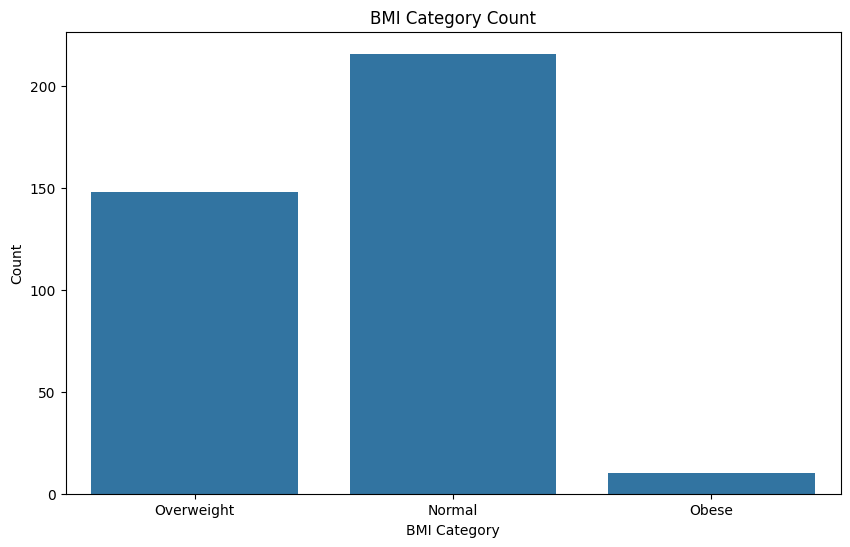

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI Category', data=df)
plt.title('BMI Category Count')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

Most of the males and females are not suffering from any sleep disorder. However females tend to have more sleep disorder as compared to males. The number of females suffering from Sleep Apnea is quite high as compared to males. But in contrast to that, greater number of males are suffering from Insomia as compared to females.

### Effect of Occupation on Sleep Disorder

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

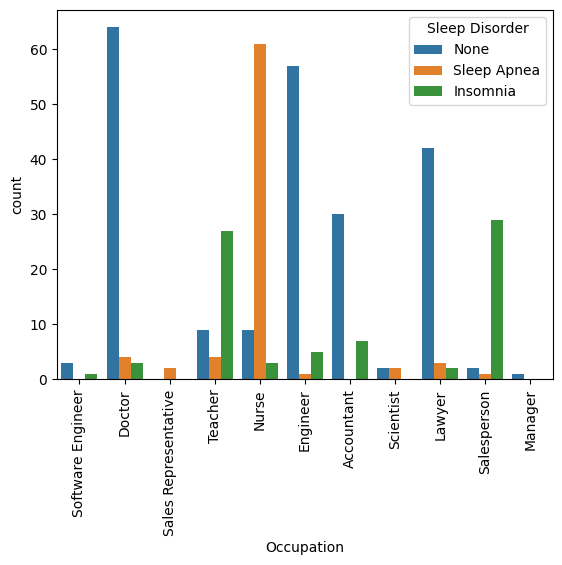

In [15]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

From the graph it is clear that the occupation has huge impact on the sleep disorder. Nurses are more subjected to have Sleep Apenea as compared to other occupations and very few of them have no sleep disorder. After nurses, the next most affected occupation is the Salesperson, which counts for the  most suffering from Insomia followed by teachers. However there are some occupations where most of the people have very few instance of Sleep Apenea and Insomia such as Engineers, Doctors, Accountants, Lawyers. 
The Software ENgineers and Managers are so less in number so I cannot say much about that, But the occupation Sales Representative has shown only Sleep Apenea and no Insomia or No sleep disorder. 

### BMI and Sleep Disorder

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

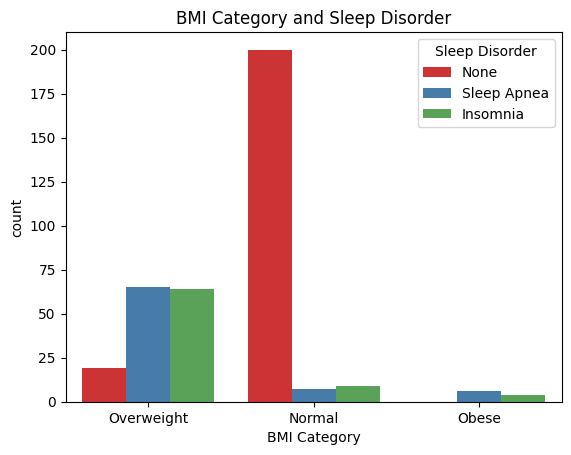

In [16]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'Set1').set_title('BMI Category and Sleep Disorder')

People with normal BMI are less likely to suffer from any sleep disorder. However, this is opposite in case of Overweight and Obese people. Overweight are more likely to suffer more from sleep disordera than Obese people.

## Data Preprocessing Part 2

#### Label Encoding for categorical variables

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [18]:
vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


## Correlation Matrix Heatmap

<Axes: >

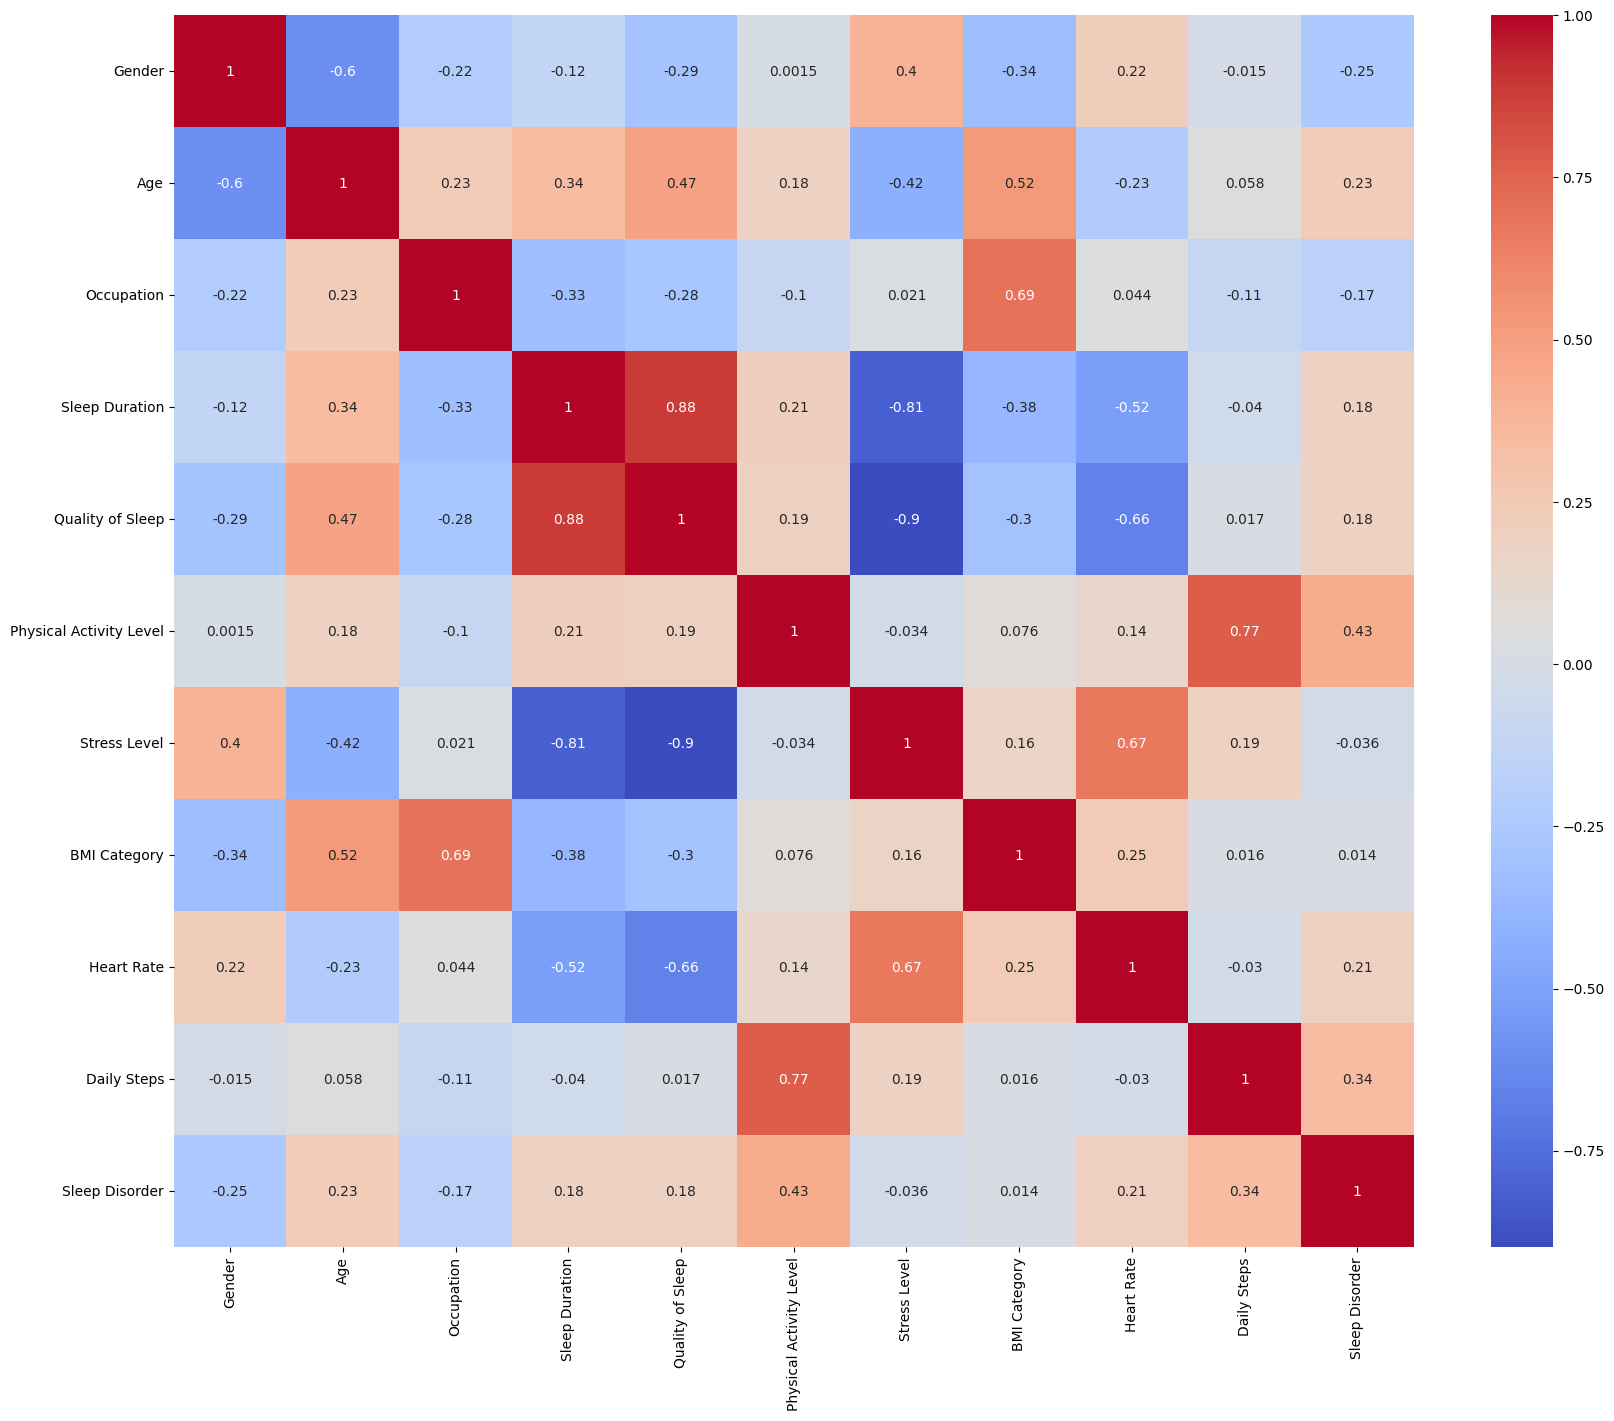

In [19]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

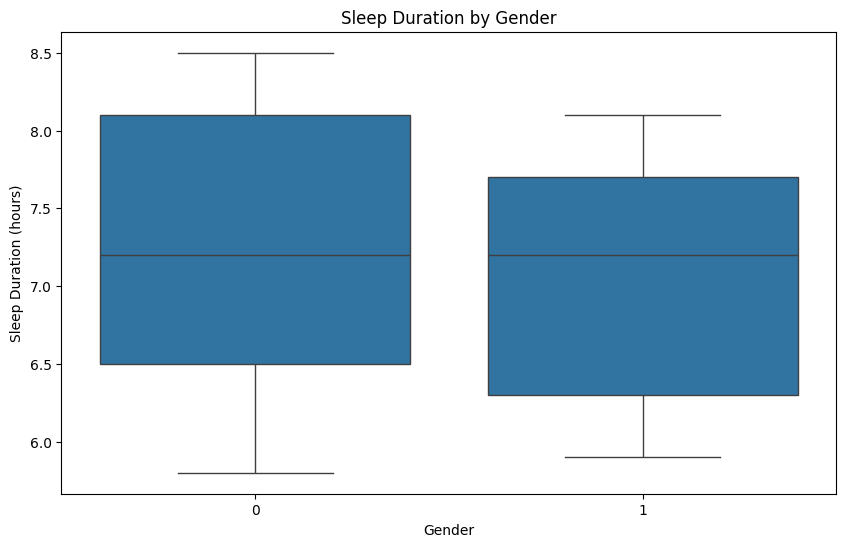

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration (hours)')
plt.show()

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder',axis=1), df['Sleep Disorder'], test_size=0.3, random_state=42)

## Model Building

For predictiong the sleep disorder thriugh classification algorithms I will use the following algorithms:
1. Decision Tree Classifier
2. Random Forest Classifier

### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

Training the model with train dataset

In [23]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
#training accuracy
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.9348659003831418


### Decision Tree Model Evalution

In [25]:
d_pred = dtree.predict(X_test)
d_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 0])

Using Confusion matrix heatmap to visualize the model accuracy

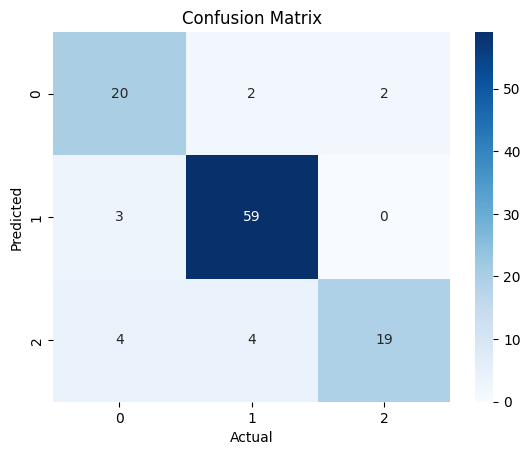

In [26]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

The diagonal boxes show the count of true positive results, i.e correct predictions made by the model. The off-diagonal boxes show the count of false positive results, i.e incorrect predictions made by the model.

### Disitribution plot for predicted and actual values

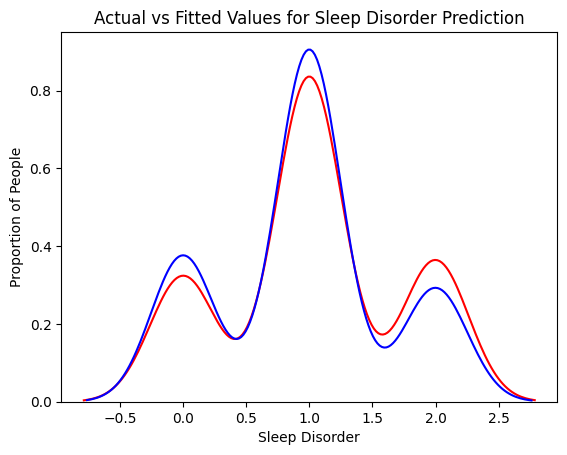

In [27]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

The actual values are represented with red and the predicted ones with blue. As shown in the graph, the model's prediction are able to follow the curve of actual values but the predicted values are still different from actual ones. Therefore the model is not able to predict the values accurately.

##### Classification Report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.91      0.95      0.93        62
           2       0.90      0.70      0.79        27

    accuracy                           0.87       113
   macro avg       0.85      0.83      0.84       113
weighted avg       0.87      0.87      0.87       113



The model gives pretty decent results with an accuracy of 87% and an average F1 score of 0.83. The model is able to predict the sleep disorder with a good accuracy.

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

Training the model with train dataset

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
#Training accuracy
print("Training accuracy: ",rfc.score(X_train,y_train))

Training accuracy:  0.9348659003831418


### Random Forest Classifier Evaluation

In [32]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1,
       2, 1, 0])

Using confusion matrix heatmap to visualize the model accuracy

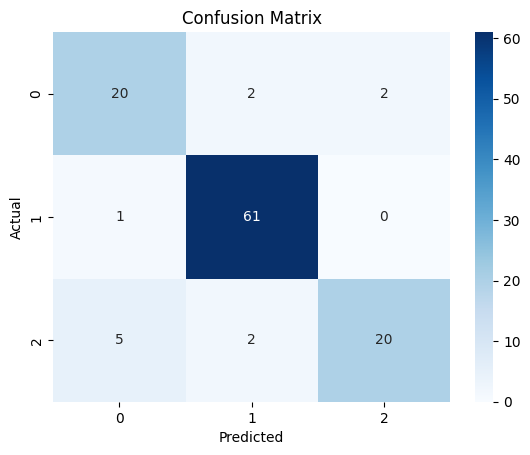

In [33]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Random Forest Classifier model  has greater accuracy than the Decision Tree Classifier model. The diagonal boxes count for the True Positives i.e correct predictions, whereas the off-diagonal boxes show the count of false positive results, i.e incorrect predictions made by the model. Since the number of false positve value is less, it shows that the model is good at predicting the correct results.

### Distribution plot for predicted and acutal values

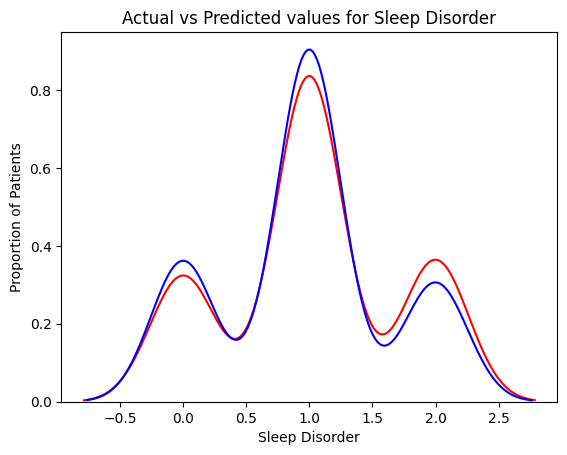

In [34]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

The Random forest classifier has improved accuracy as compared to the Decision Tree which is shown with the gap between the actual and predcited values which was wider incase of Descision Tree Classifier.

#### Classification Report

In [35]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



The Random Forest Classifier model has an accuracy of 89%  and an avergae F1 score of 0.86. From the metrics it is quite clear that the model is able to predict the sleep disorder quite effectively, with increased accuracy than Decision Tree Classifer.